In [1]:
import numpy as np
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
# 予測結果の精度確認（ROC曲線の描画）
from sklearn.metrics import roc_auc_score, roc_curve
# データを扱う
import pandas as pd
# グラフ描画
from matplotlib import pyplot as plt

In [2]:
import torch
# 自動微分の関数 
from torch.autograd import Variable
# ニューラルネットワークの関数
import torch.nn as nn
# 活性化関数
import torch.nn.functional as F
# 最適化のアルゴリズムの関数
import torch.optim as optim
#ユーティリティのデータから
from torch.utils.data import DataLoader ,TensorDataset

In [3]:
## def MedcDataChange(df_x):
##      aaa
    
    
    

In [4]:
##  class MedcDataset():
##      def __init__():
##          super().__init__()
##          
##          # CSVファイル読み込み（訓練データ）
##          df = pd.read_csv('train.csv')
##          
##          df_x = df.drop(['disease'], axis=1)
##          df_y = df['disease']
    

## 訓練データの読み込み

In [5]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


In [6]:
# 性別を変換する（訓練データ）
# gemder=pd.get_dummies(df_train.loc[:,['Gender']])
# df_train['Female']=gemder.loc[:,['Gender_Female']]
# df_train['Male']=gemder.loc[:,['Gender_Male']]
df_train.drop(columns=['Gender'],inplace=True)
df_train.drop(columns=['Age'],inplace=True)
df_train.head()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


In [7]:
df_train.describe()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,1.607337,0.606737,272.211316,41.978476,61.018120,7.032290,3.517458,1.144570,0.444706
std,2.443585,1.569032,200.348515,145.927366,110.125390,0.840664,0.559942,0.227237,0.497226
min,0.585961,0.034861,163.261838,3.924518,11.283497,4.858679,2.180884,0.627133,0.000000
25%,0.781258,0.144889,213.991414,13.644658,21.239157,6.730612,3.139153,1.004466,0.000000
50%,0.835591,0.194085,220.092503,16.638001,27.056026,6.915580,3.621339,1.205016,0.000000
75%,1.196759,0.335447,229.455927,23.056081,56.461568,7.536151,3.712524,1.287880,1.000000
max,23.017027,17.692164,2108.483728,1423.186473,814.439397,8.739000,5.016970,1.821496,1.000000


In [8]:
sigma=df_train.std()
print(sigma)
print('   ')
print(sigma*3)
print('   ')
print(sigma['TP'])

T_Bil         2.443585
D_Bil         1.569032
ALP         200.348515
ALT_GPT     145.927366
AST_GOT     110.125390
TP            0.840664
Alb           0.559942
AG_ratio      0.227237
disease       0.497226
dtype: float64
   
T_Bil         7.330755
D_Bil         4.707096
ALP         601.045545
ALT_GPT     437.782098
AST_GOT     330.376170
TP            2.521992
Alb           1.679825
AG_ratio      0.681712
disease       1.491677
dtype: float64
   
0.8406638990699148


In [9]:
df_desc = df_train.describe()
print(df_desc.loc['25%','T_Bil'])

0.7812584352498221


# 評価データの読み込み

In [10]:
# CSVファイル読み込み（評価データ）
df_vat = pd.read_csv('test.csv')
df_vat.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,25,Male,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006
1,26,Female,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562
2,64,Male,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579
3,65,Male,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070
4,34,Female,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078


In [11]:
# 性別を変換する（検証データ）
# gemder=pd.get_dummies(df_vat.loc[:,['Gender']])
# df_vat['Female']=gemder.loc[:,['Gender_Female']]
# df_vat['Male']=gemder.loc[:,['Gender_Male']]
df_vat.drop(columns=['Gender'],inplace=True)
df_vat.drop(columns=['Age'],inplace=True)
df_vat.head()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006
1,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562
2,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579
3,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070
4,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078


## データを加工する

In [12]:
# 特徴量選択
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
# 多項式・交互作用特徴量
from sklearn.preprocessing import PolynomialFeatures


#### 訓練データのデータ加工前処理

In [13]:
# 説明変数（訓練データ）
#x_tmp=xConv(df_train.loc[:,['Age', 'T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio', 'Female', 'Male']])
#x_tmp=xConv(df_train.loc[:,['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio']])
#x_tmp=xConv(df_train.loc[:,['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT']])
#x_tmp=df_train.loc[:,['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio']]
x_tmp=df_train.loc[:,['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT']]

In [14]:
col='T_Bil'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat

col='D_Bil'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat


col='ALP'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat


col='ALT_GPT'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat


col='AST_GOT'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat

In [15]:
col='T_Bil'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='D_Bil'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='ALP'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='ALT_GPT'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='AST_GOT'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

##  col='TP'
##  maxval=df_desc.loc['max',col]
##  x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

##  col='Alb'
##  maxval=df_desc.loc['max',col]
##  x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

##  col='AG_ratio'
##  maxval=df_desc.loc['max',col]
##  x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


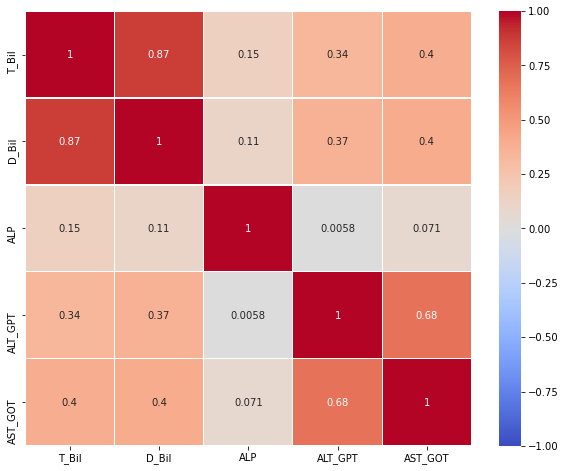

In [16]:
# seabornライブラリをsnsという省略名でインポート
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(x_tmp.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


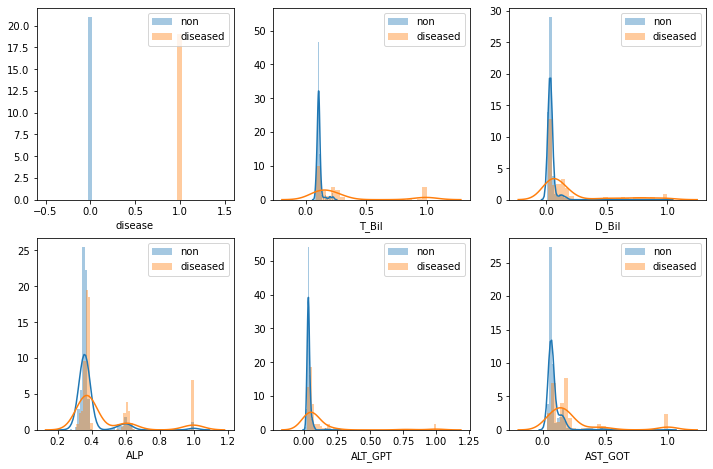

In [17]:

#グラフの表示
plt.figure(figsize=(12, 12))
# disease列とdf_numericを結合
df_csatt = pd.concat([df_train["disease"], x_tmp], axis=1)


for ncol, colname in enumerate(df_csatt.columns):
    plt.subplot(3, 3, ncol+1)
    sns.distplot(df_csatt.query("disease==0")[colname])
    sns.distplot(df_csatt.query("disease==1")[colname])
    plt.legend(labels=["non", "diseased"], loc='upper right')
plt.show()

In [18]:
x_tmp.describe()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT
count,850.000000,850.000000,850.000000,850.000000,850.000000
mean,0.197239,0.109233,0.424238,0.071275,0.156462
std,0.227871,0.197602,0.158909,0.142658,0.192032
min,0.079932,0.007406,0.271630,0.008965,0.034153
25%,0.106573,0.030781,0.356032,0.031168,0.064288
50%,0.113984,0.041233,0.366183,0.038005,0.081895
75%,0.163252,0.071264,0.381761,0.052666,0.170901
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
print(x_tmp.shape)

(850, 5)


In [20]:
# 目的変数（訓練データ）
y_train = np.array(df_train.loc[:,['disease']])

# 組み込み法に使うモデルの指定
fs_model = LogisticRegression(penalty='l2', random_state=0)
# 閾値の指定
fs_threshold = "mean"
# 組み込み法モデルの初期化
selector = SelectFromModel(fs_model, threshold=fs_threshold)

# 特徴量生成
polynomial = PolynomialFeatures(degree=3, include_bias=False)
polynomial_arr = polynomial.fit_transform(np.array(x_tmp))
# polynomial_arrのデータフレーム化 （※カラムはshape[1]でpolynomial_arrの列数分だけ出力）
X_polynomial = pd.DataFrame(polynomial_arr, columns=["poly" + str(x_) for x_ in range(polynomial_arr.shape[1])])

# 特徴量選択の実行
selector.fit(X_polynomial, y_train)
mask = selector.get_support()

# 選択された特徴量だけのサンプル取得
X_polynomial_masked = X_polynomial.loc[:, mask]

x_train = np.array(X_polynomial_masked)




C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [21]:
X_polynomial.describe()

,poly0,poly1,poly2,poly3,poly4,poly5,poly6,poly7,poly8,poly9,...,poly45,poly46,poly47,poly48,poly49,poly50,poly51,poly52,poly53,poly54
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,...,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,8.500000e+02,850.000000,850.000000,850.000000
mean,0.197239,0.109233,0.424238,0.071275,0.156462,0.090768,0.060672,0.089129,0.025035,0.048206,...,0.119256,0.014704,0.034414,0.010132,0.011843,0.025818,2.079825e-02,0.019924,0.023917,0.044833
std,0.227871,0.197602,0.158909,0.142658,0.192032,0.250145,0.189902,0.130416,0.108027,0.136843,...,0.218127,0.034914,0.056267,0.053638,0.050152,0.076840,1.316015e-01,0.129198,0.134358,0.189426
min,0.079932,0.007406,0.271630,0.008965,0.034153,0.006389,0.000682,0.028081,0.000834,0.003257,...,0.020042,0.001283,0.003957,0.000030,0.000213,0.000447,7.204188e-07,0.000009,0.000019,0.000040
25%,0.106573,0.030781,0.356032,0.031168,0.064288,0.011358,0.003396,0.038558,0.003449,0.007015,...,0.045130,0.004085,0.008183,0.000361,0.000755,0.001472,3.027709e-05,0.000068,0.000135,0.000266
50%,0.113984,0.041233,0.366183,0.038005,0.081895,0.012992,0.004683,0.042604,0.004495,0.009959,...,0.049101,0.005343,0.011622,0.000569,0.001426,0.002645,5.489457e-05,0.000151,0.000297,0.000549
75%,0.163252,0.071264,0.381761,0.052666,0.170901,0.026656,0.012010,0.080379,0.009901,0.023603,...,0.055639,0.010225,0.028328,0.001281,0.003672,0.011900,1.460778e-04,0.000407,0.001372,0.004992
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.758481,0.535862,0.575293,0.385577,0.610327,1.000000e+00,1.000000,1.000000,1.000000


In [22]:
X_polynomial_masked.describe()

,poly0,poly1,poly2,poly3,poly4,poly5,poly6,poly7,poly9,poly11,poly15,poly16,poly22,poly29
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,0.197239,0.109233,0.424238,0.071275,0.156462,0.090768,0.060672,0.089129,0.048206,0.049798,0.030370,0.068532,0.043372,0.047428
std,0.227871,0.197602,0.158909,0.142658,0.192032,0.250145,0.189902,0.130416,0.136843,0.102134,0.059147,0.085885,0.134260,0.111095
min,0.079932,0.007406,0.271630,0.008965,0.034153,0.006389,0.000682,0.028081,0.003257,0.002439,0.003391,0.012703,0.002245,0.008993
25%,0.106573,0.030781,0.356032,0.031168,0.064288,0.011358,0.003396,0.038558,0.007015,0.011723,0.011449,0.022947,0.004153,0.013709
50%,0.113984,0.041233,0.366183,0.038005,0.081895,0.012992,0.004683,0.042604,0.009959,0.015627,0.014696,0.031383,0.004932,0.015582
75%,0.163252,0.071264,0.381761,0.052666,0.170901,0.026656,0.012010,0.080379,0.023603,0.035162,0.023435,0.069317,0.013578,0.034686
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.758481,0.610327,1.000000,1.000000


In [23]:
X_polynomial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   poly0   850 non-null    float64
 1   poly1   850 non-null    float64
 2   poly2   850 non-null    float64
 3   poly3   850 non-null    float64
 4   poly4   850 non-null    float64
 5   poly5   850 non-null    float64
 6   poly6   850 non-null    float64
 7   poly7   850 non-null    float64
 8   poly8   850 non-null    float64
 9   poly9   850 non-null    float64
 10  poly10  850 non-null    float64
 11  poly11  850 non-null    float64
 12  poly12  850 non-null    float64
 13  poly13  850 non-null    float64
 14  poly14  850 non-null    float64
 15  poly15  850 non-null    float64
 16  poly16  850 non-null    float64
 17  poly17  850 non-null    float64
 18  poly18  850 non-null    float64
 19  poly19  850 non-null    float64
 20  poly20  850 non-null    float64
 21  poly21  850 non-null    float64
 22  po

In [24]:
X_polynomial_masked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   poly0   850 non-null    float64
 1   poly1   850 non-null    float64
 2   poly2   850 non-null    float64
 3   poly3   850 non-null    float64
 4   poly4   850 non-null    float64
 5   poly5   850 non-null    float64
 6   poly6   850 non-null    float64
 7   poly7   850 non-null    float64
 8   poly9   850 non-null    float64
 9   poly11  850 non-null    float64
 10  poly15  850 non-null    float64
 11  poly16  850 non-null    float64
 12  poly22  850 non-null    float64
 13  poly29  850 non-null    float64
dtypes: float64(14)
memory usage: 93.1 KB


#### 評価データのデータ加工前処理

In [25]:
# 説明変数（評価データ）
#x_tmp=xConv(df_vat)
#x_tmp=df_vat
x_tmp=df_vat.loc[:,['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT']]

In [26]:
col='T_Bil'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat

col='D_Bil'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat

col='ALP'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat

col='ALT_GPT'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat

col='AST_GOT'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat


In [27]:
col='T_Bil'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='D_Bil'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='ALP'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='ALT_GPT'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='AST_GOT'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

##  col='TP'
##  maxval=df_desc.loc['max',col]
##  x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

##  col='Alb'
##  maxval=df_desc.loc['max',col]
##  x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

##  col='AG_ratio'
##  maxval=df_desc.loc['max',col]
##  x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

In [28]:

# 組み込み法に使うモデルの指定
fs_model = LogisticRegression(penalty='l2', random_state=0)
# 閾値の指定
fs_threshold = "mean"
# 組み込み法モデルの初期化
selector = SelectFromModel(fs_model, threshold=fs_threshold)

# 特徴量生成
polynomial = PolynomialFeatures(degree=3, include_bias=False)
polynomial_arr = polynomial.fit_transform(x_tmp)
# polynomial_arrのデータフレーム化 （※カラムはshape[1]でpolynomial_arrの列数分だけ出力）
X_polynomial = pd.DataFrame(polynomial_arr, columns=["poly" + str(x) for x in range(polynomial_arr.shape[1])])

# 選択された特徴量だけのサンプル取得
X_polynomial_masked = X_polynomial.loc[:, mask]

x_vat = np.array(X_polynomial_masked)


In [29]:
# yの変換
#y = np.zeros((len(y_train), 1 + y_train.max()), dtype=int)
#y[np.arange(len(y_train)), y_train.T] = 1
#y_train = y
# 分割
X_train,X_test,Y_train,Y_test=train_test_split(x_train, y_train, test_size=0.25, random_state=1) 

In [30]:
# 標準化
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = StandardScaler() 
#norm = MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_vat=sc.transform(x_vat)

In [31]:
# numpy の値を torch の値に変換する
X_train = torch.from_numpy(X_train).float()
Y_train = torch.from_numpy(Y_train).float()
X_test = torch.from_numpy(X_test).float()
Y_test = torch.from_numpy(Y_test).float()
X_vat  = torch.from_numpy(x_vat).float()

In [32]:
# 行数、列数の確認
in_size=X_train.shape[1]
reccnt=X_train.shape[0]
print(X_train.shape)
print(X_test.shape)


torch.Size([637, 14])
torch.Size([213, 14])


In [33]:
out_size=Y_train.shape[1]
Y_train.shape

torch.Size([637, 1])

In [34]:
print(X_vat.shape)


torch.Size([350, 14])


In [35]:
# x と y の値をひとつの変数に格納する
train = TensorDataset(X_train ,Y_train)

In [1]:
batchsize=50

# batch_size ：学習する時にまとめるデータ数
# shuffle    : データをランダムに並び替える場合はTrue
#train_loader = DataLoader(train ,batch_size=30, shuffle=True, num_workers=2)
train_loader = DataLoader(train ,batch_size=batchsize, shuffle=True)

NameError: name 'DataLoader' is not defined

In [2]:
node1=10
node2=5


# Module を継承して、Netクラスを作成する
#  ノード数や階層を増やす　⇒　精度が向上する、学習のパフォーマンスは落ちる
#  ノード数や階層を減らす　⇒　精度が下がる、学習のパフォーマンスは上がる
#   　ノードや階層を変更しても精度が上がらない　⇒　入力データが不足している
class Net(nn.Module):
    # 初期化の関数
    def __init__(self):
        super(Net ,self).__init__()
        # ドロップアウト
        p=0.5
        self.dropout1 = nn.Dropout(p)
        self.dropout2 = nn.Dropout(p)
        # 全結合層
        self.fc1 = nn.Linear(in_size , node1)         # nn.Linear (入力のノード数 , 中間層ノード数)
        self.fc2 = nn.Linear(node1 , node2)           # nn.Linear (中間層ノード数 , 中間層ノード数)
        self.fc3 = nn.Linear(node2,  out_size)        # nn.Linear (中間層ノード数 , 出力のノード数)
    
    # ネットワークを通して、出力値を求める関数
    def forward(self ,x):
#        x = torch.relu(self.fc1(x))              # 入力のノードを中間層（１階層目）に渡して結果を得る
#        x = F.sigmoid(self.fc2(x))               # 中間層（１階層目）を中間層（２階層目）に渡して結果を得る
        x = torch.sigmoid (self.fc1(x))           # 入力のノードを中間層（１階層目）に渡して結果を得る
        x = self.dropout1(x)
        x = torch.sigmoid(self.fc2(x))           # 中間層（１階層目）を中間層（２階層目）に渡して結果を得る
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc3(x))           # 中間層（２階層目）の結果を出力層に渡す
        return x

NameError: name 'nn' is not defined

In [38]:
# モデルの定義
model = Net()
# 損失の定義 (平均二乗誤差)
#criterion = nn.MSELoss()
# 損失の定義 (平均二乗誤差)
criterion = nn.BCELoss()
# 損失の定義 (交差エントロピー誤差関数)
#criterion = nn.CrossEntropyLoss()

In [39]:
# 最適化のアルゴリズムの選択　（Adam：Stochastic Gradient Descent）
## model.parameters  調整する値
## lr(learning rate) ：学習率　どれぐらいの幅でパラメータを更新していくのか
optimizer = optim.Adam(model.parameters() , lr=0.01)
#optimizer = optim.SGD(model.parameters() , lr=0.01)

In [40]:
import math

loss_list = []
loss_temp = 0
logdisp=50
accuracy_list = []

correct_counter = 0
acccnt=reccnt*logdisp
epochs=1000


# トレーニングの回数分ループする。
for epoch in range(epochs):
    # 損失を初期化　
    total_loss = 0
    
    for x_train , y_train in train_loader:

        # 出力を計算する 
        output = model(x_train)
        # 損失の計算 (出力の結果；output と 正解：y_trainを渡す)
        loss = criterion(output ,y_train)

        correct_temp = (y_train == output.round()).sum()
        correct_counter += correct_temp

        # パラメータの勾配を初期化する
        optimizer.zero_grad()
        # ロスを伝播する
        loss.backward()
        # パラメータを更新する
        optimizer.step()

        # トータルロスを格納
        total_loss += loss.item()
    
    
    # 10回毎に回数とトータルロスを表示する
    if (epoch+1)%logdisp == 0:
        loss_tmp=total_loss/acccnt
        print(f'Epoch\t{epoch+1}\t\tLoss\t{loss_tmp:.8f}\t\taccuracy:\t{(correct_counter*100)/acccnt:.3f}%')
        
        accuracy_list.append(correct_counter.item()*100/(acccnt))
        loss_list.append(loss_tmp)
        loss_temp=0
        total_loss=0
        correct_counter = 0
        

..\aten\src\ATen\native\BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


Epoch	50		Loss	0.00018035		accuracy:	79.000%
Epoch	100		Loss	0.00017512		accuracy:	81.000%
Epoch	150		Loss	0.00016440		accuracy:	81.000%
Epoch	200		Loss	0.00016624		accuracy:	82.000%
Epoch	250		Loss	0.00015888		accuracy:	82.000%
Epoch	300		Loss	0.00015851		accuracy:	82.000%
Epoch	350		Loss	0.00015519		accuracy:	82.000%
Epoch	400		Loss	0.00016641		accuracy:	83.000%
Epoch	450		Loss	0.00015696		accuracy:	83.000%
Epoch	500		Loss	0.00015982		accuracy:	83.000%
Epoch	550		Loss	0.00015452		accuracy:	83.000%
Epoch	600		Loss	0.00016116		accuracy:	83.000%
Epoch	650		Loss	0.00015480		accuracy:	83.000%
Epoch	700		Loss	0.00015840		accuracy:	83.000%
Epoch	750		Loss	0.00015986		accuracy:	83.000%
Epoch	800		Loss	0.00015145		accuracy:	83.000%
Epoch	850		Loss	0.00015311		accuracy:	83.000%
Epoch	900		Loss	0.00015590		accuracy:	83.000%
Epoch	950		Loss	0.00015410		accuracy:	83.000%
Epoch	1000		Loss	0.00014599		accuracy:	83.000%


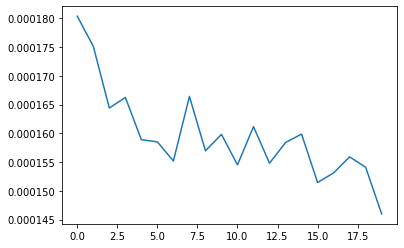

In [41]:
# ロスのプロット
plt.plot(loss_list)

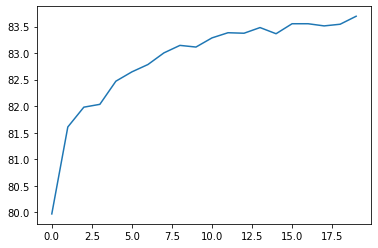

In [42]:
plt.plot(accuracy_list)

## 誤差の確認

In [43]:
#print(Y_test)

In [45]:
# 学習を行わないモードに変更
model.eval()

# テストデータ
x ,y = Variable(X_test) ,Variable(Y_test)
###   # テストデータｘに対する結果　（値の大きい方を取得する）
###   y_hat = torch.max(model(x).data ,1)[1]
###   y_true = torch.max(y ,1)[1]
###   # テストｘの結果とｙの比較　（結果が一致したら加算して、不一致は加算しない。その結果をデータ数で割る）
###   accuracy = np.sum(y_true.data.numpy() == y_hat.numpy()) /len(y_true.data.numpy())
###   print(accuracy)
###   print(y_hat.numpy())
###   print(y_true.data.numpy())

y_hat=model(x).data
y_hat2=y_hat.numpy()
y_true=Y_test.numpy()
accuracy = np.sum(Y_test.numpy() == y_hat2) /len(Y_test.numpy())
print(accuracy)


0.0


## ROC曲線の描画（偽陽性率、真陽性率、閾値の算出）

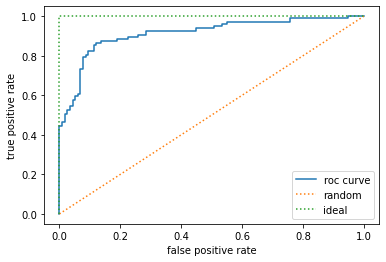

[1.999977   0.999977   0.99997437 0.94130003 0.86942345 0.8674314
 0.8641323  0.8201729  0.81501937 0.80521894 0.8037725  0.80052984
 0.80036056 0.7991213  0.79890066 0.79837215 0.79756224 0.7967238
 0.79610986 0.5555579  0.55472124 0.480287   0.46508414 0.45011386
 0.44457272 0.4419379  0.43767804 0.40885305 0.39962223 0.3982508
 0.39571443 0.39499646 0.38082308 0.3790778  0.34730968 0.3374715
 0.2676112  0.25886086 0.24442017 0.19575514 0.13079408 0.1302513
 0.11791302 0.11739887 0.10724259 0.1054073  0.10300191 0.09821979
 0.06592166 0.06231744 0.03532705 0.03461405 0.03068018]


In [46]:
# ROC曲線の描画（偽陽性率、真陽性率、閾値の算出）
fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_hat)
plt.plot(fpr, tpr, label='roc curve')
plt.plot([0, 1], [0, 1], linestyle=':', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
print(thresholds)

In [47]:
# AUCスコアの算出
auc_score = roc_auc_score(y_true=y_true, y_score=y_hat)
print("AUC:", auc_score)

AUC: 0.9132598649129045


#  予測する

In [48]:
y_predict = model(X_vat).data
print(y_predict)
y_predict = y_predict.numpy()
df_out = pd.DataFrame(np.array(y_predict ,dtype=np.int32), columns=['val'])

df_out.to_csv('./submit.csv', encoding='utf_8_sig' , header=False)


tensor([[0.9972],
        [0.9968],
        [0.9971],
        [0.9976],
        [0.9941],
        [0.9970],
        [1.0000],
        [0.9994],
        [0.9983],
        [0.9978],
        [0.9994],
        [0.9916],
        [0.9972],
        [1.0000],
        [0.9967],
        [0.9946],
        [0.9992],
        [0.9964],
        [0.9981],
        [0.9957],
        [0.9993],
        [0.9946],
        [0.9959],
        [0.9990],
        [0.9977],
        [0.9950],
        [0.9971],
        [0.9999],
        [0.9979],
        [1.0000],
        [0.9986],
        [1.0000],
        [0.9967],
        [0.9968],
        [0.9999],
        [1.0000],
        [0.9942],
        [0.9981],
        [0.9975],
        [1.0000],
        [0.9979],
        [0.9982],
        [1.0000],
        [0.9985],
        [0.9992],
        [0.9990],
        [0.9974],
        [0.9999],
        [0.9978],
        [0.9987],
        [0.9989],
        [0.9965],
        [1.0000],
        [0.9991],
        [0.9999],
        [0

# モデルの保存

In [ ]:
#model_path = 'model.pth'
#torch.save(model.to('cpu').state_dict(), model_path)